In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import ssm
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
import scipy
import scipy.io
import tsfresh
import dtale
import os
px.set_mapbox_access_token("pk.eyJ1IjoibWlrb2xhanNsdXBpbnNraSIsImEiOiJjazJ5dDI0MWEwOTA3M2hxanRwbmo4NDRuIn0.NSbj3B1Bm6fC5QUP3s-BjQ")
import plotly.io as pio
pio.renderers.default = "iframe"
import dask
from lib.huawei import load_data, load_motion, load_ambient, load_battery, load_api, load_label
import tables
from ssm.util import random_rotation, find_permutation
import logging
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
logging.basicConfig(filename='huawei_hmm.log', level=logging.DEBUG)

In [36]:
MODELS_PATH = "../Models/hmm_parallel/"

In [37]:
with open("../Data/huawei-competition/selected_features.pickle", "rb") as ifile:
    selected_features = pickle.load(ifile)[:20]

In [38]:
data = []
for selected_feature in selected_features:
#     file_path = os.path.join("../Data/2012.01.17-huawei/splitted/", f"1.3a-stationary_50ms__{selected_feature}.csv")
#     df = pd.read_csv(file_path, parse_dates = ["DATETIME_UTC"], index_col="DATETIME_UTC")
    a = np.load(os.path.join("../", selected_feature))
    data.append(a)
#     print(df.shape)
data = np.stack(data, axis=1)

In [39]:
labels = np.load("../Data/huawei-competition/resampled/Label.npy")[:,-1].astype(int) - 1

In [40]:
order = np.loadtxt("../Data/huawei-competition/train_order.txt").astype(int)

In [41]:
data_ordered = np.zeros(data.shape)

In [42]:
data_ordered[order - 1, :] = data

In [43]:
labels_ordered = np.zeros(labels.shape)
labels_ordered[order - 1] = labels

In [44]:
n = int(data_ordered.shape[0]*0.25)
m = int(data_ordered.shape[0]*0.5)
X_train = data_ordered[m:]
y_train = labels_ordered[m:]
X_val = data_ordered[:n]
y_val = labels_ordered[:n]
X_test = data_ordered[n:m]
y_test = labels_ordered[n:m]

In [45]:
def load_model(path):
    with open(path, "rb") as ifile:
        model_dic = pickle.load(ifile)
    return model_dic

In [46]:
models_dic = {}
for f in os.listdir(MODELS_PATH):
    if "reduced" not in f:
        continue
    models_dic[f] = load_model(os.path.join(MODELS_PATH, f))

In [47]:
np.unique(y_train, return_counts=True)

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 array([1176,  949,  338, 1110, 1195,  993, 1455,  939]))

In [48]:
def plot_states(data_z, z_est, label, prefix):
    titles = ["True", label]
    states_list = [data_z, z_est]
    fig, axs = plt.subplots(2,1, figsize=(6,4))
    for (i, ax, states) in zip(range(len(axs)), axs, states_list):
        ax.imshow(states[None,:], aspect="auto")
        ax.set_yticks([])
        ax.set_title(titles[i])
        if i < (len(axs) - 1):
            ax.set_xticks([])

    plt.suptitle(f"{titles[0]} and {titles[1]}", va="baseline")
    plt.tight_layout()
    plt.savefig(f"../Plots/hmm/{prefix}_{titles[0]}_{titles[1]}.pdf")
    plt.show()

In [50]:
# from collections import defaultdict
mutual_informations = {}

huawei_reduced_hmm_recurrent_diagonal_gaussian_10000_10000_random


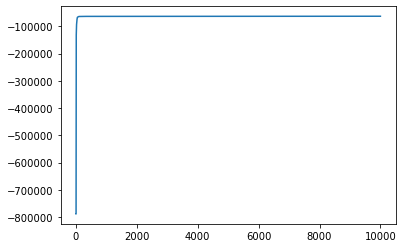

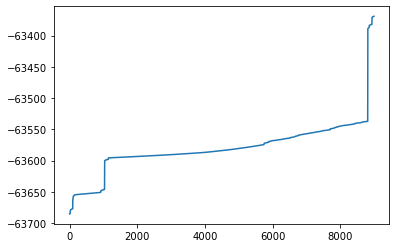

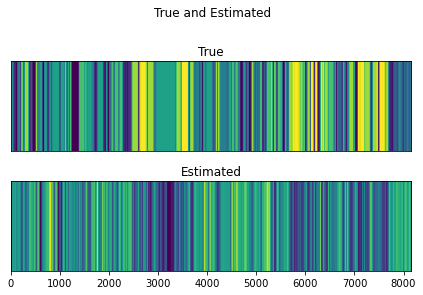

0.05174739423666462


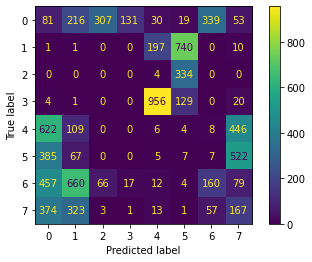

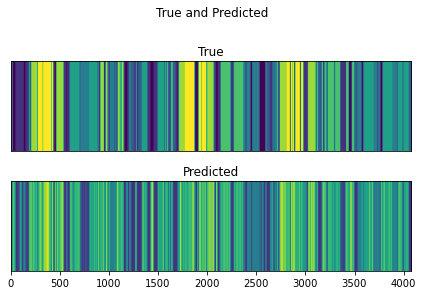

0.4792739759627177


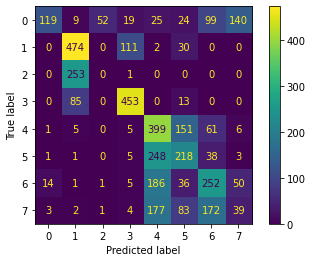

huawei_reduced_hmm_recurrent_gaussian_10000_10000_random


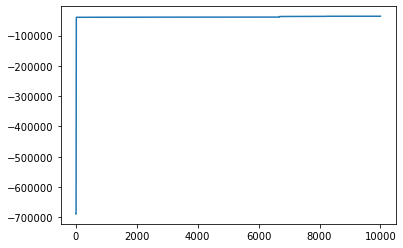

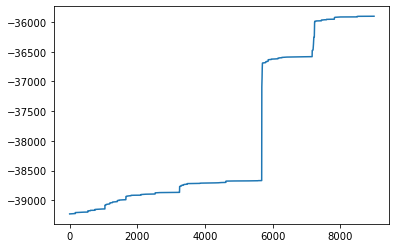

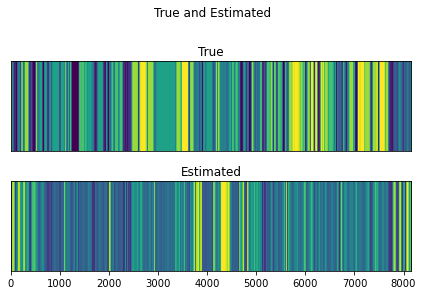

0.18626609442060085


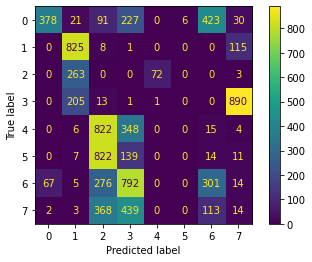

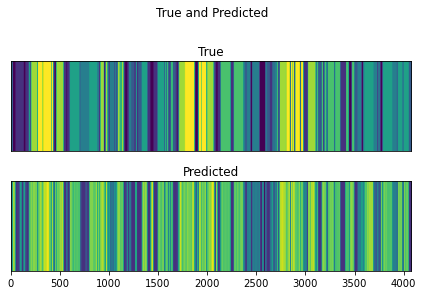

0.45940642629384354


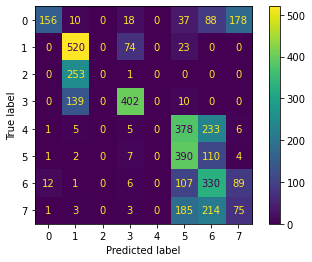

huawei_reduced_hmm_recurrent_no_input_ar_10000_10000_random


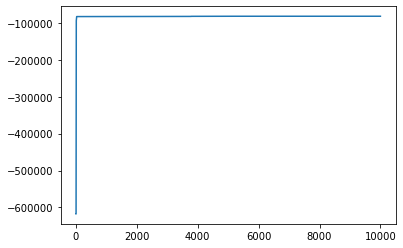

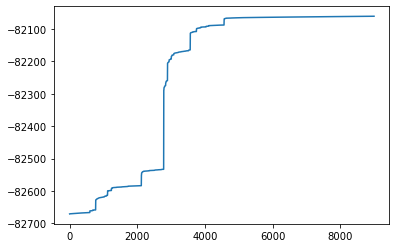

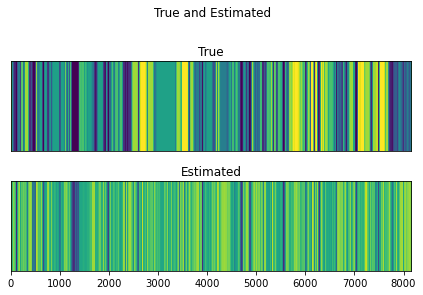

0.24794604537093806


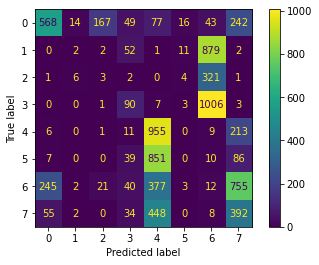

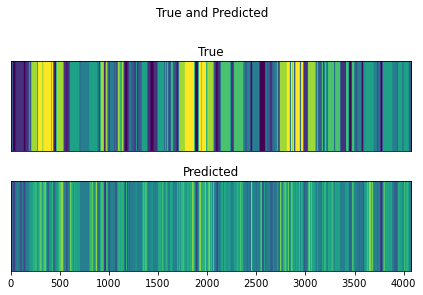

0.3801815060093206


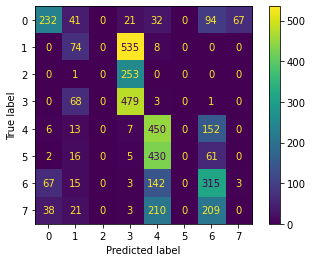

huawei_reduced_hmm_recurrent_robust_ar_10000_10000_random


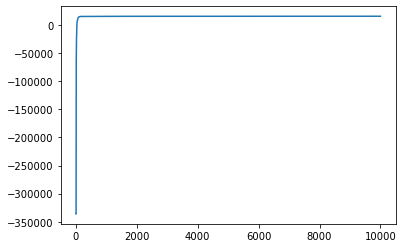

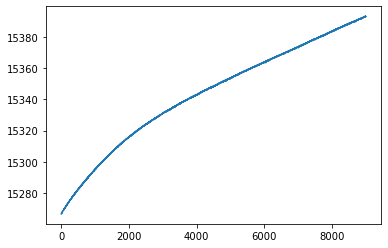

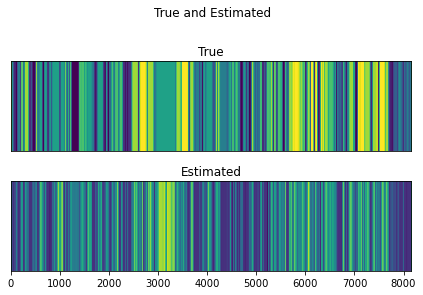

0.1748620478234212


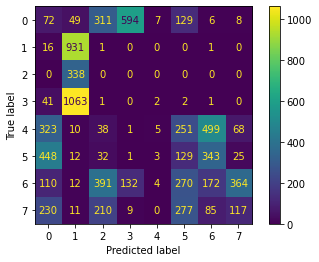

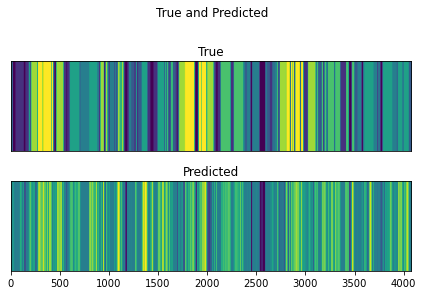

0.3487858719646799


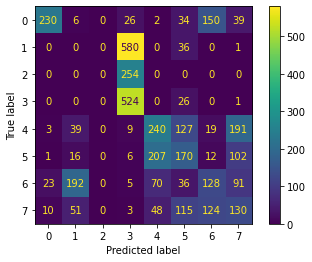

huawei_reduced_hmm_recurrent_diagonal_gaussian_10000_10000_kmeans


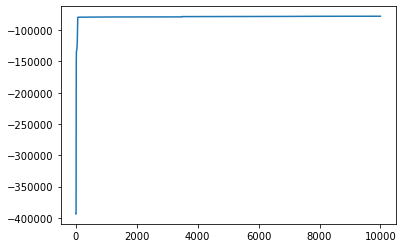

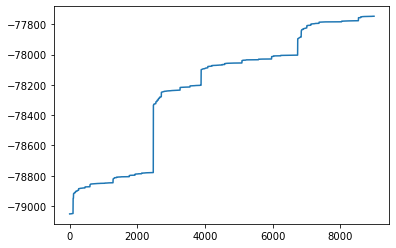

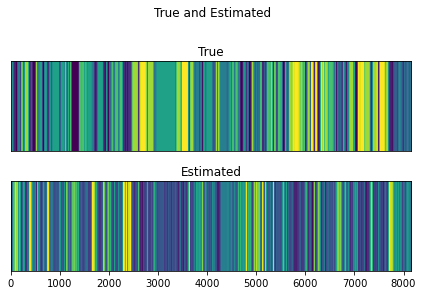

0.1547516860821582


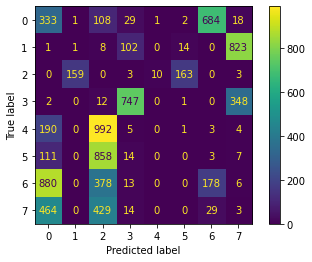

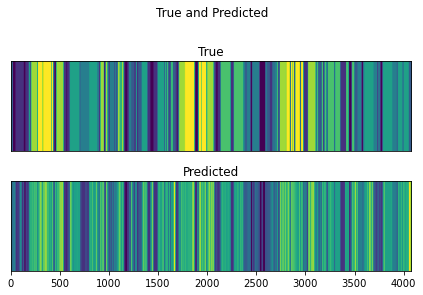

0.5114054451802796


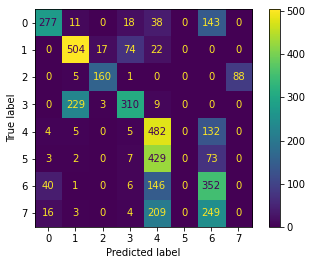

huawei_reduced_hmm_recurrent_gaussian_10000_10000_kmeans


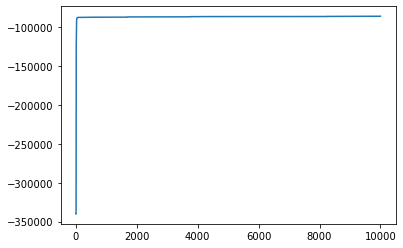

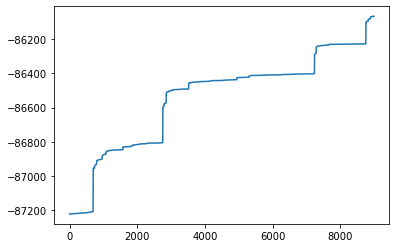

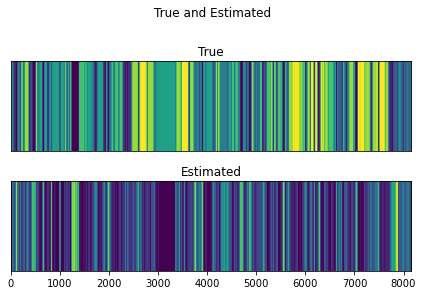

0.195340282035561


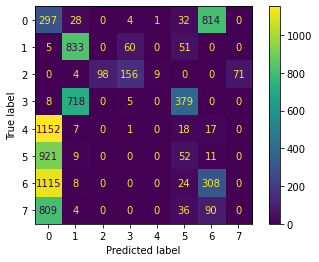

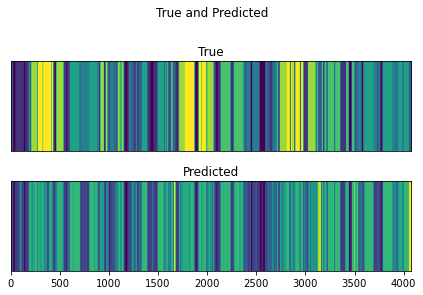

0.4321805248957567


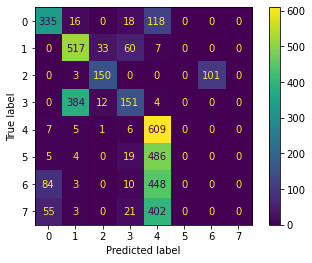

huawei_reduced_hmm_standard_diagonal_gaussian_10000_10000_random


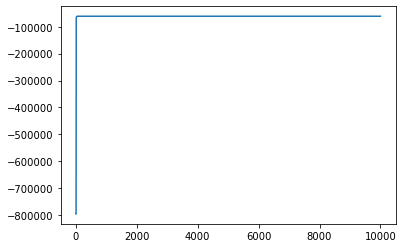

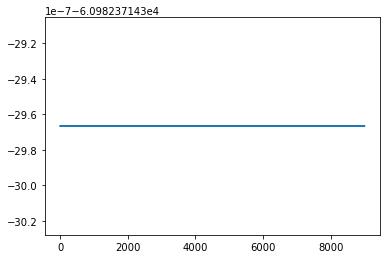

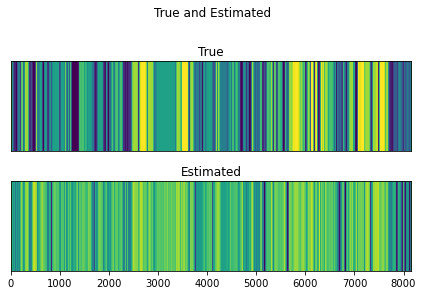

0.25824647455548744


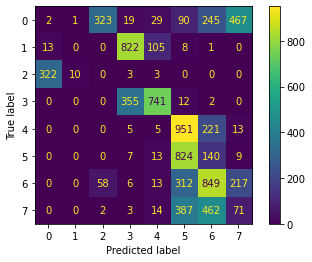

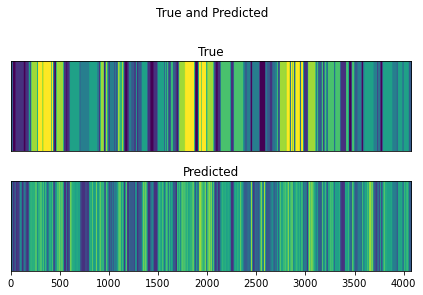

0.5045376502330144


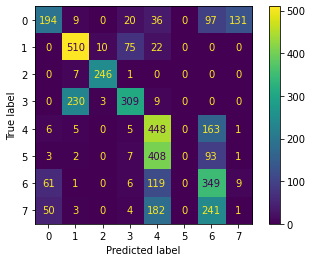

huawei_reduced_hmm_standard_diagonal_gaussian_10000_10000_kmeans


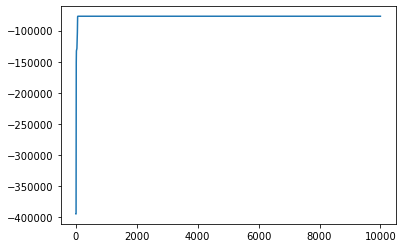

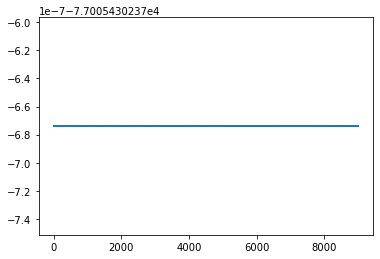

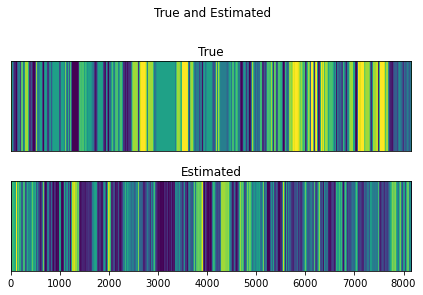

0.06229307173513182


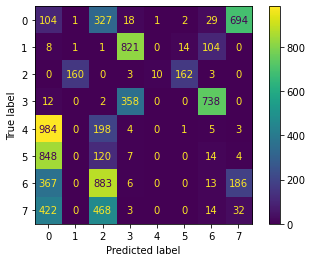

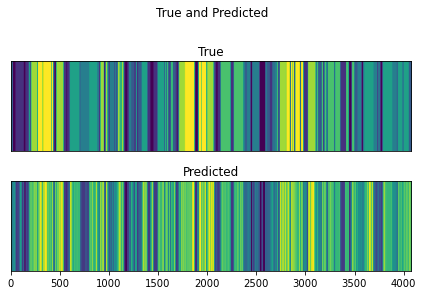

0.5096884964434634


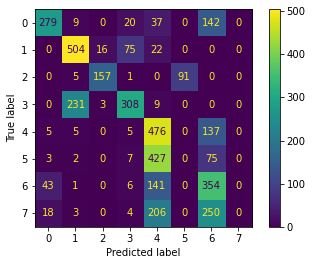

huawei_reduced_hmm_standard_autoregressive_10000_10000_random


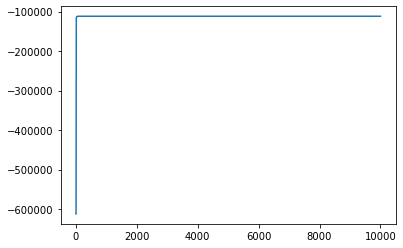

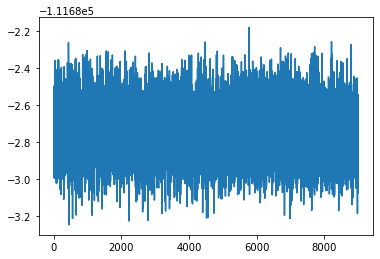

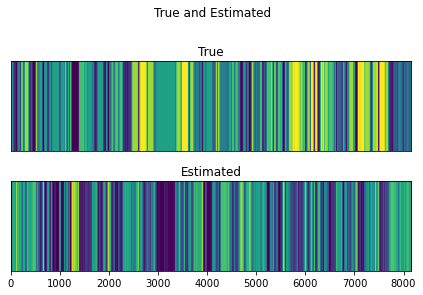

0.07357449417535254


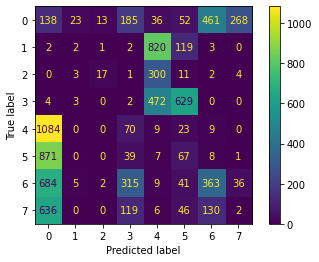

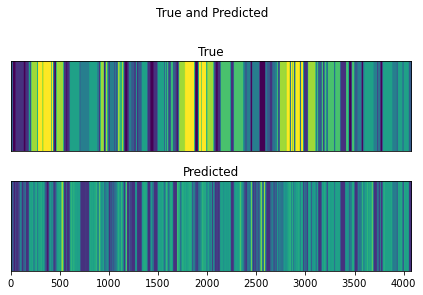

0.4042187883247486


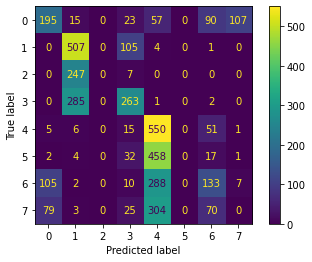

huawei_reduced_hmm_recurrent_no_input_ar_10000_10000_kmeans


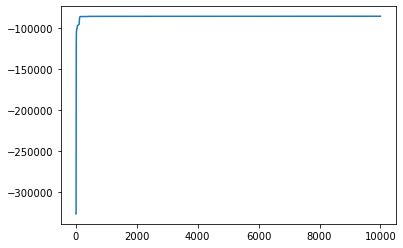

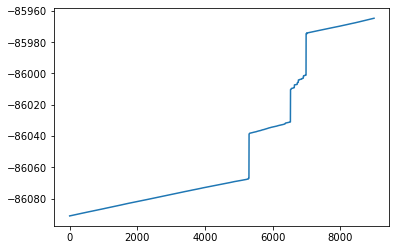

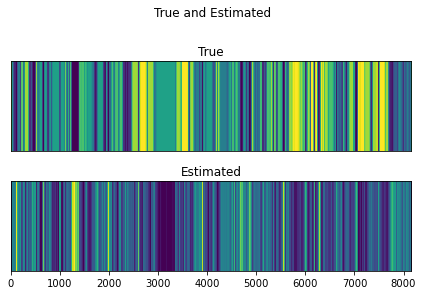

0.2317596566523605


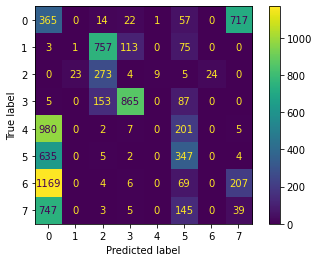

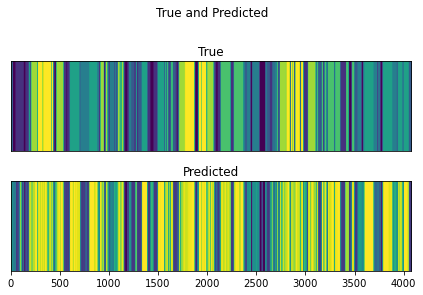

0.422859946038754


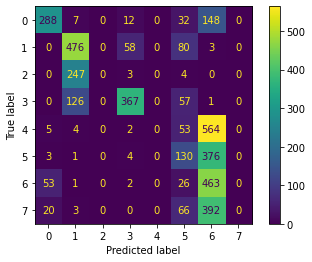

huawei_reduced_hmm_standard_autoregressive_10000_10000_kmeans


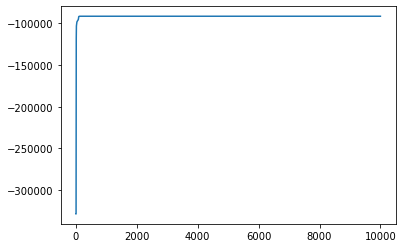

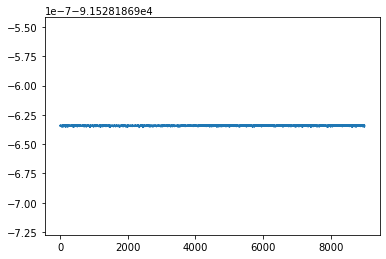

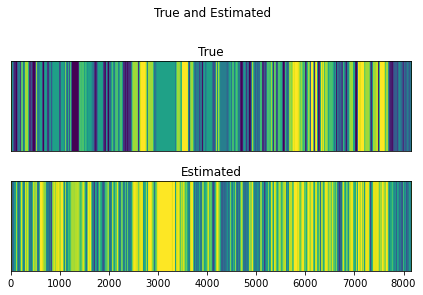

0.25003065603923974


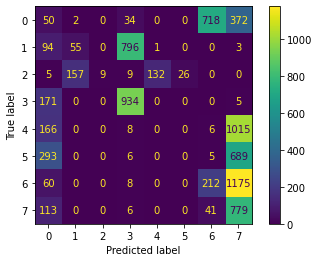

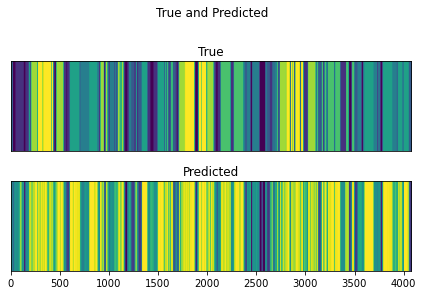

0.3367672308069659


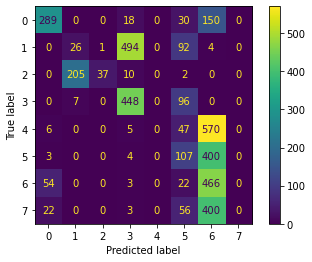

huawei_reduced_hmm_recurrent_autoregressive_10000_10000_kmeans


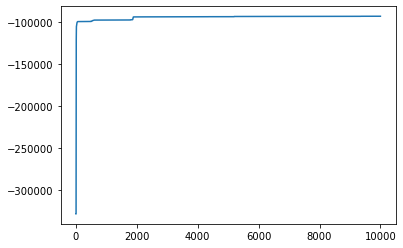

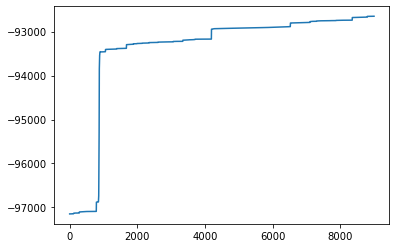

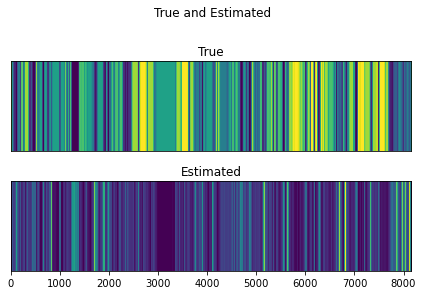

0.16676885346413242


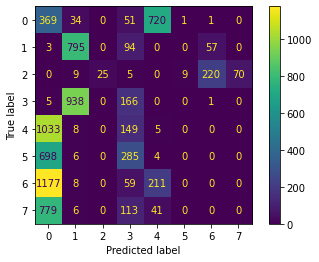

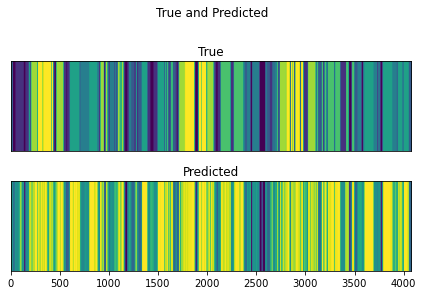

0.37870983566347804


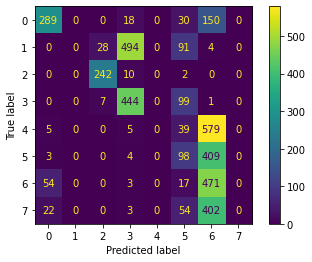

huawei_reduced_hmm_recurrent_diagonal_robust_ar_10000_10000_random


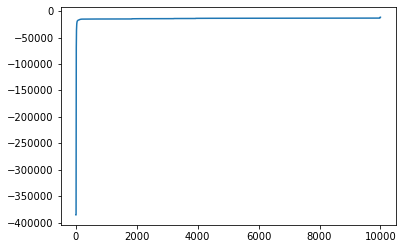

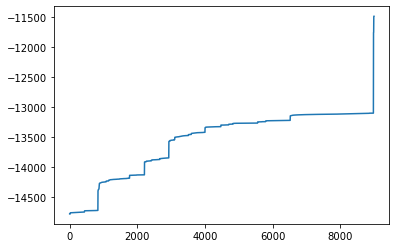

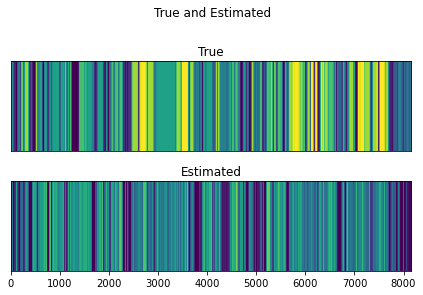

0.12115266707541386


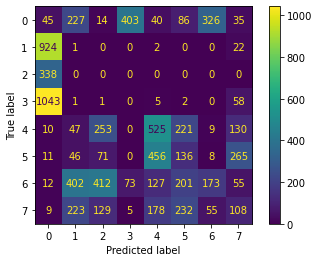

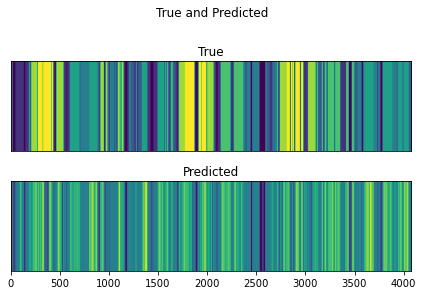

0.32671081677704195


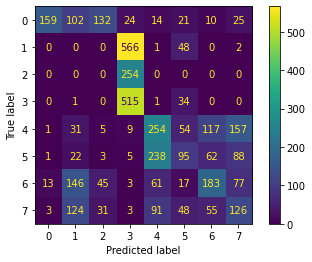

huawei_reduced_hmm_standard_no_input_ar_10000_10000_kmeans


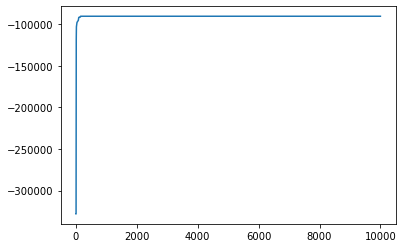

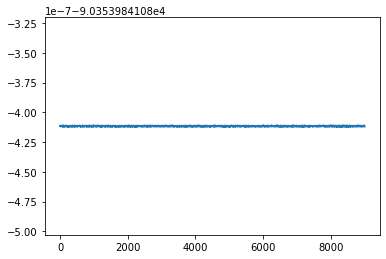

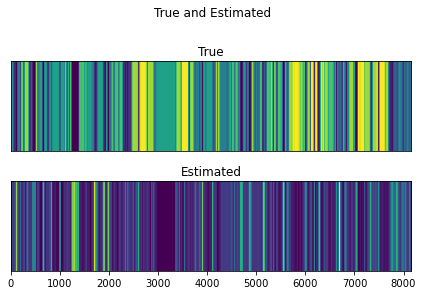

0.16946658491722869


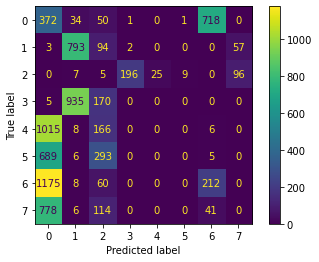

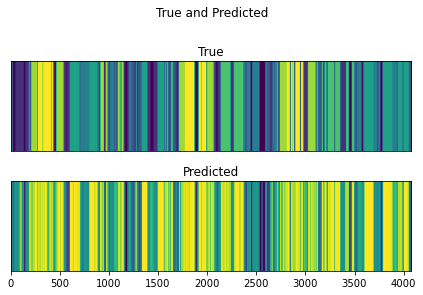

0.3659553593328428


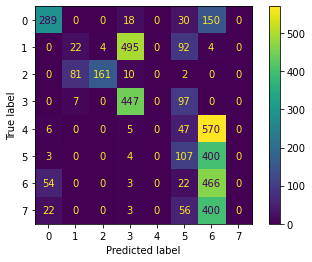

huawei_reduced_hmm_standard_diagonal_ar_10000_10000_kmeans


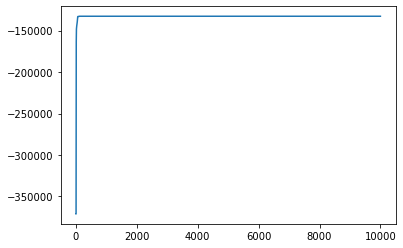

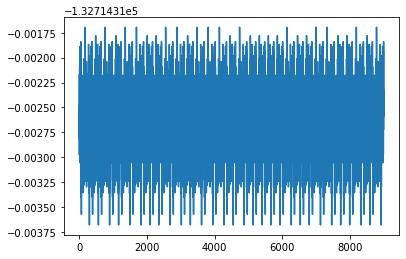

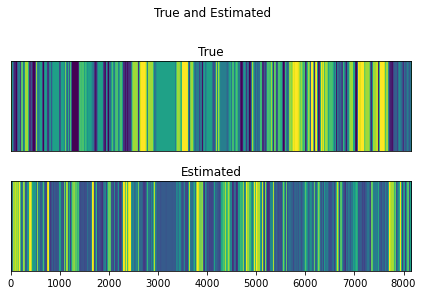

0.03923973022685469


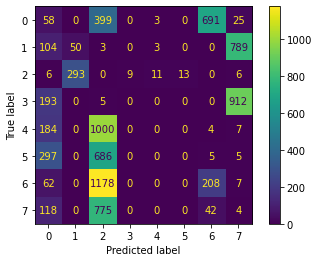

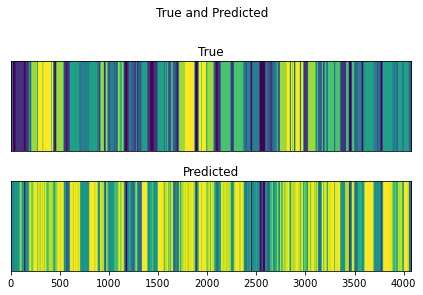

0.37723816531763554


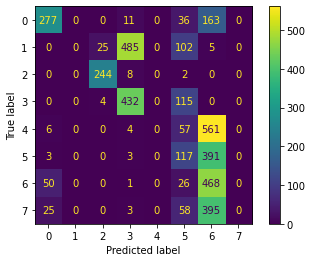

huawei_reduced_hmm_recurrent_diagonal_ar_10000_10000_random


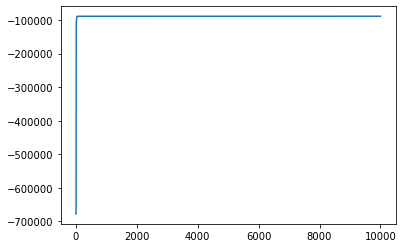

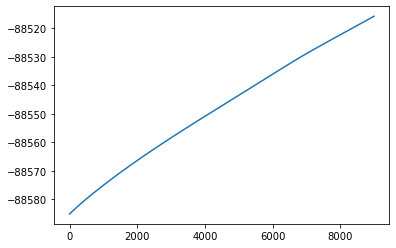

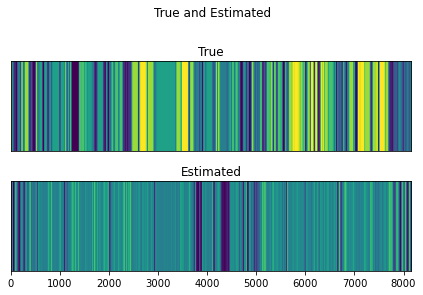

0.027345187001839362


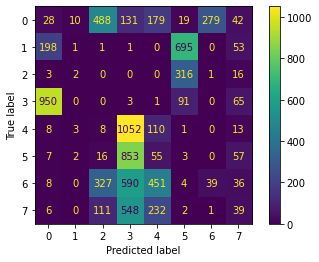

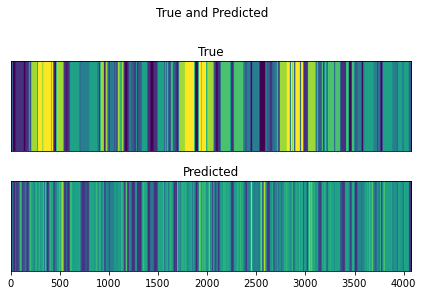

0.4424822173166544


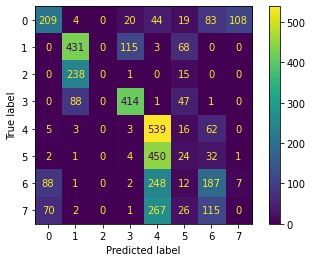

huawei_reduced_hmm_standard_diagonal_robust_ar_10000_10000_random


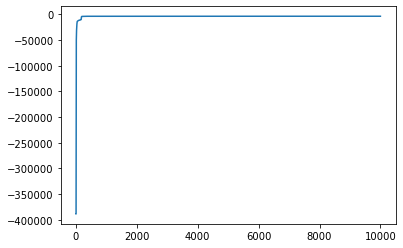

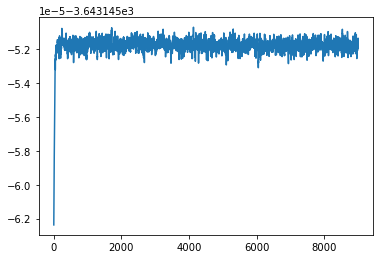

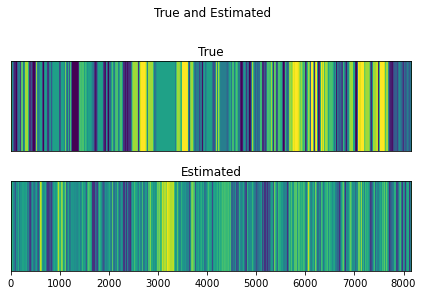

0.1629675045984059


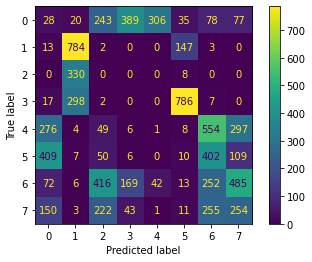

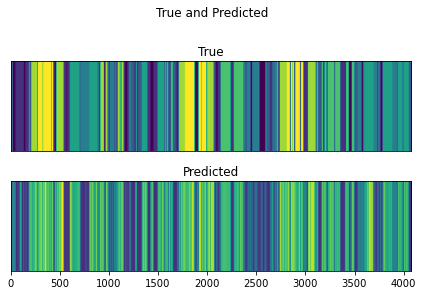

0.42948246259504536


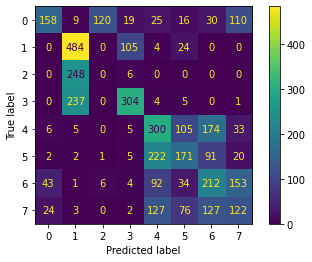

huawei_reduced_hmm_standard_robust_ar_10000_10000_random


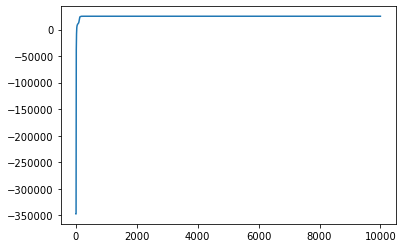

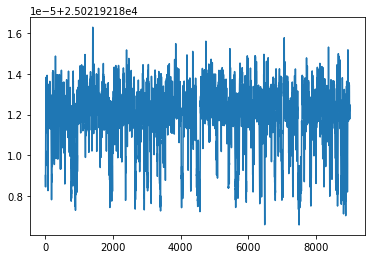

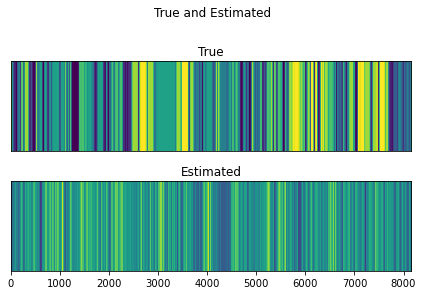

0.13500919681177193


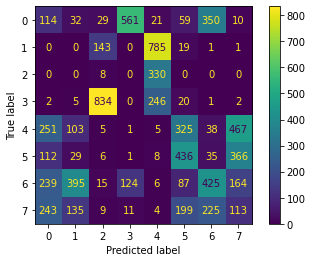

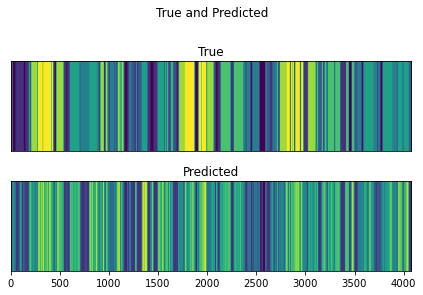

0.4204071621290164


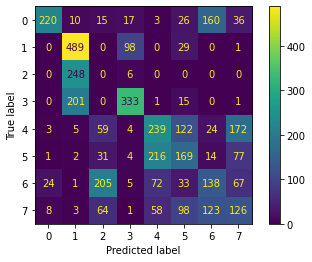

huawei_reduced_hmm_standard_gaussian_10000_10000_random


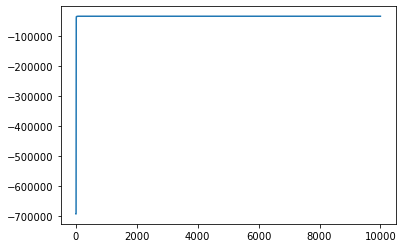

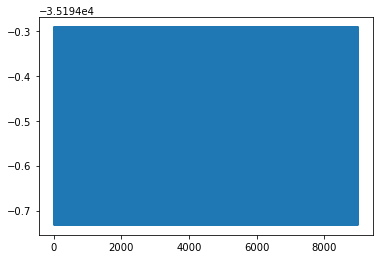

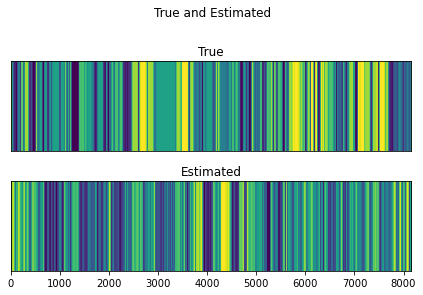

0.0990803188228081


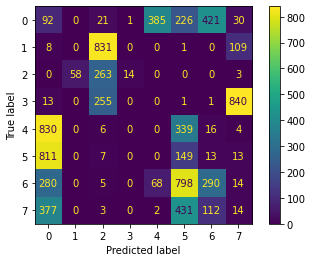

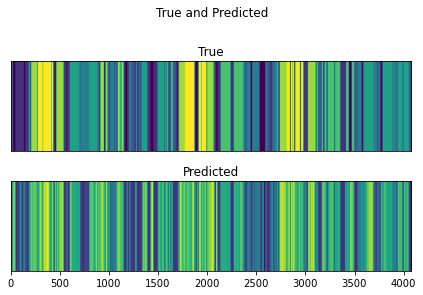

0.4493500122639196


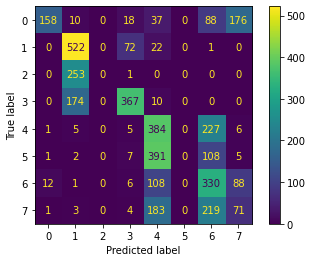

huawei_reduced_hmm_standard_robust_ar_10000_10000_kmeans


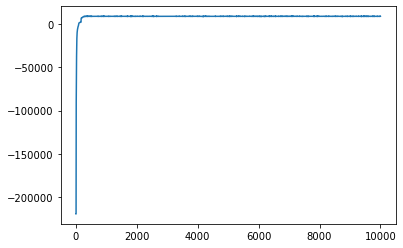

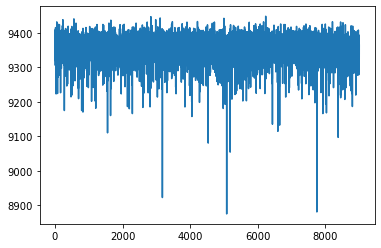

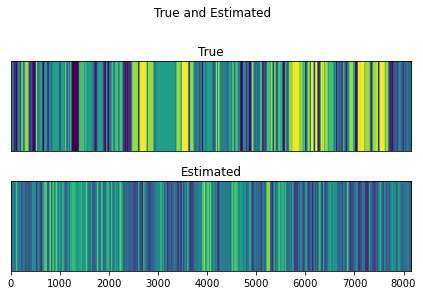

0.20208461066830166


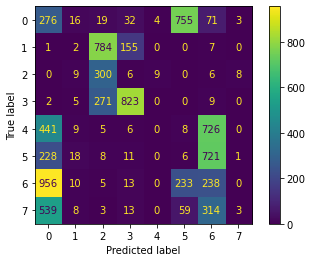

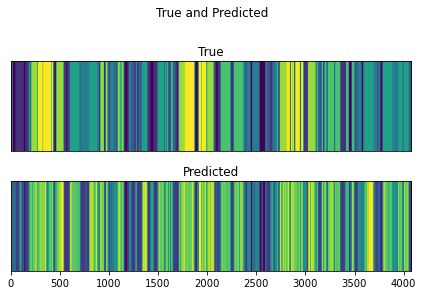

0.459896983075791


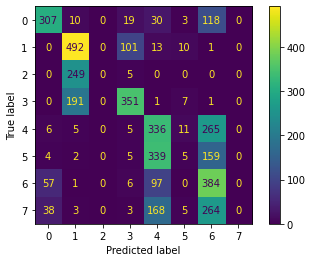

huawei_reduced_hmm_standard_gaussian_10000_10000_kmeans


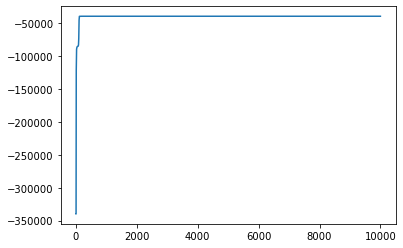

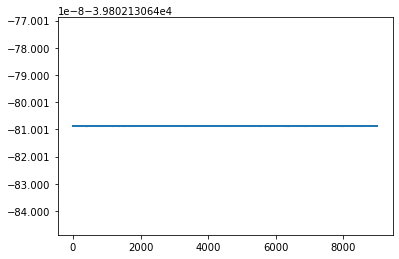

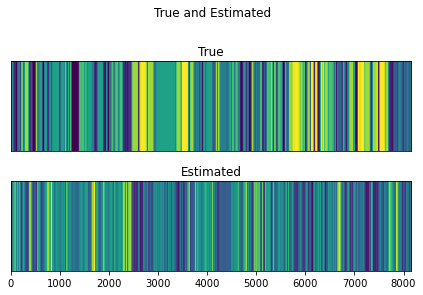

0.15573267933782955


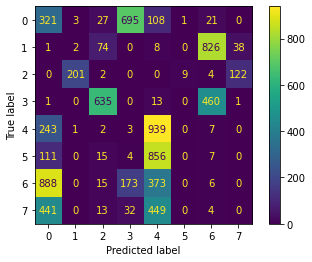

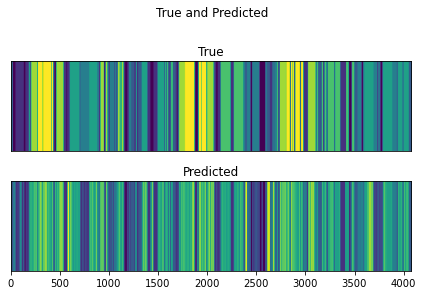

0.49350012263919546


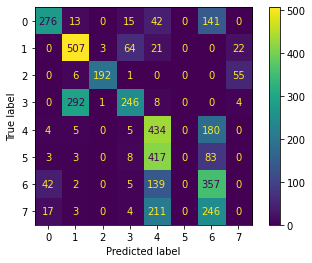

huawei_reduced_hmm_recurrent_diagonal_ar_10000_10000_kmeans


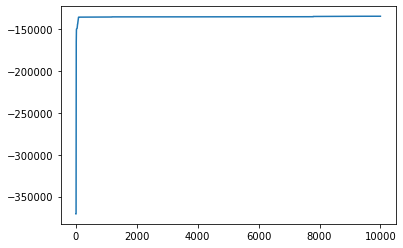

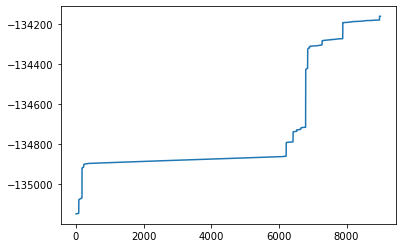

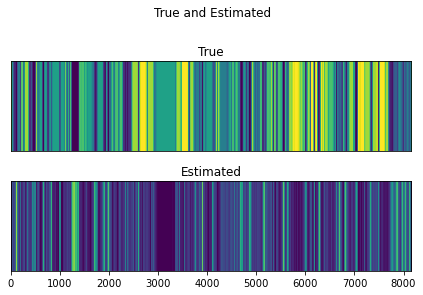

0.1942366646229307


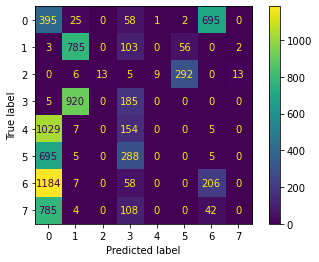

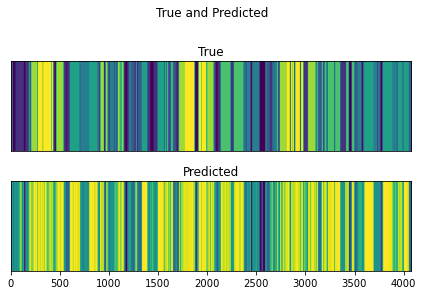

0.3745401030169242


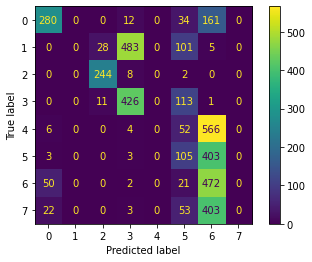

huawei_reduced_hmm_stationary_autoregressive_10000_10000_kmeans


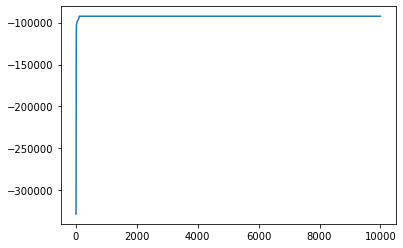

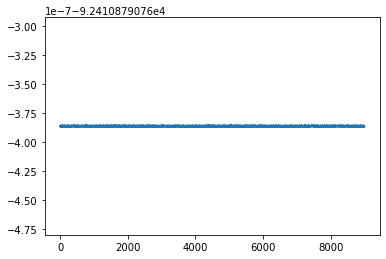

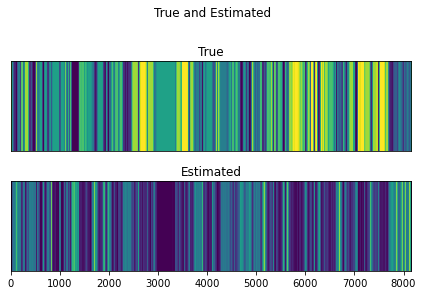

0.16088289393010424


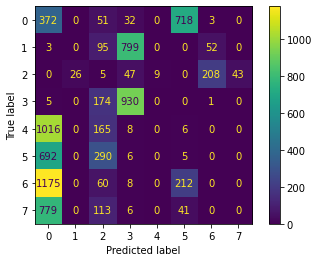

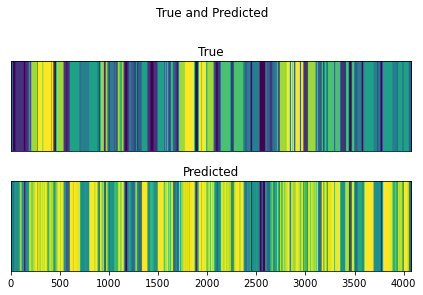

0.3804267844002943


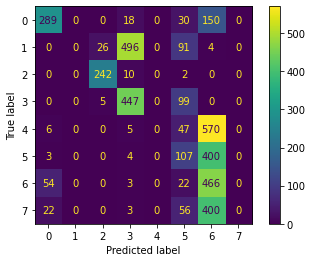

huawei_reduced_hmm_recurrent_only_robust_ar_10000_10000_random


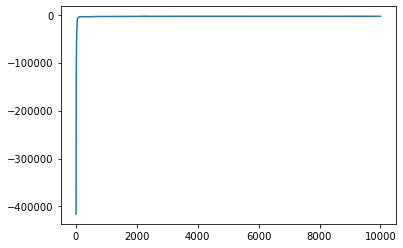

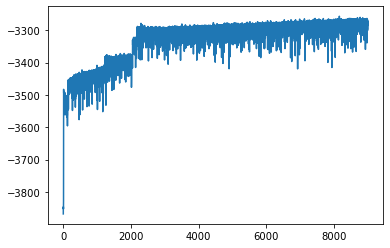

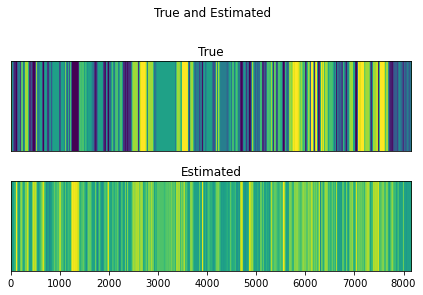

0.19840588595953404


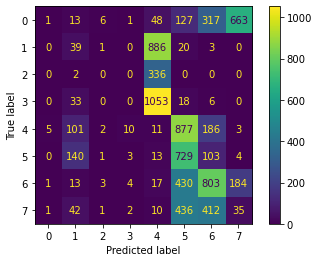

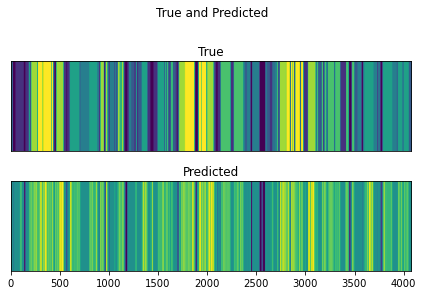

0.4034829531518273


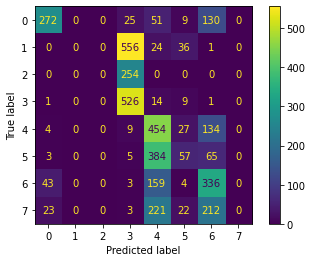

huawei_reduced_hmm_stationary_no_input_ar_10000_10000_kmeans


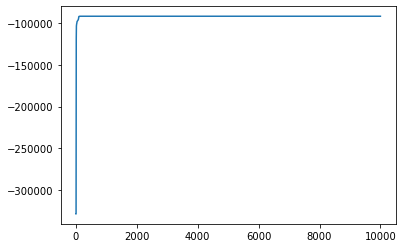

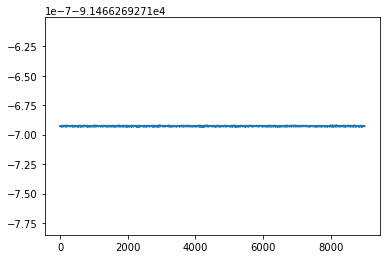

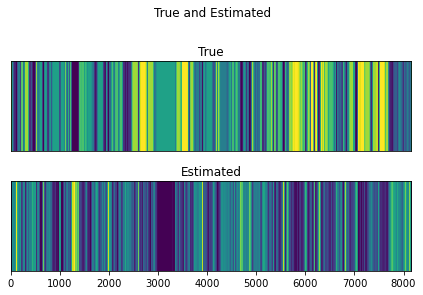

0.21802575107296138


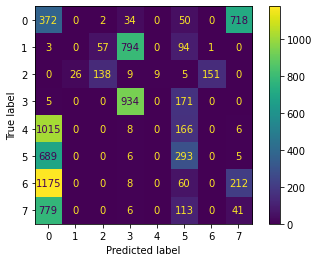

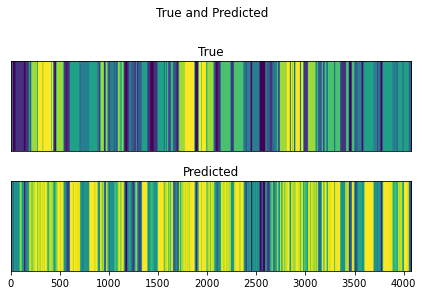

0.3509933774834437


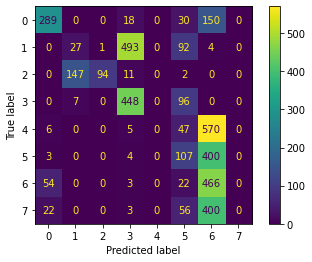

huawei_reduced_hmm_recurrent_only_diagonal_gaussian_10000_10000_kmeans


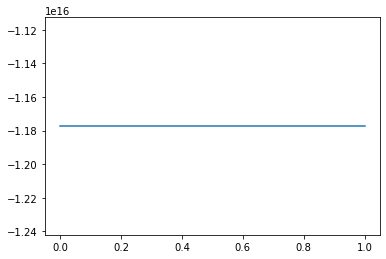

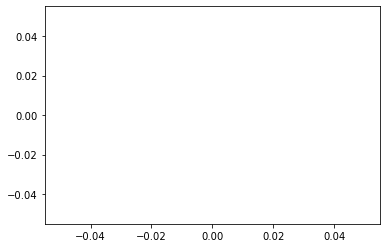

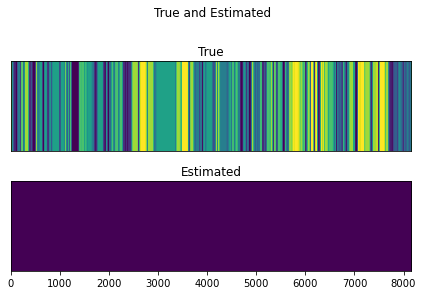

0.14420600858369098


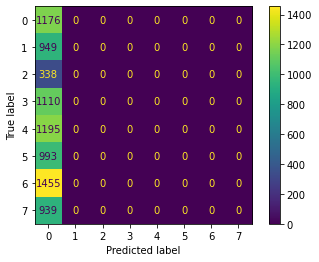

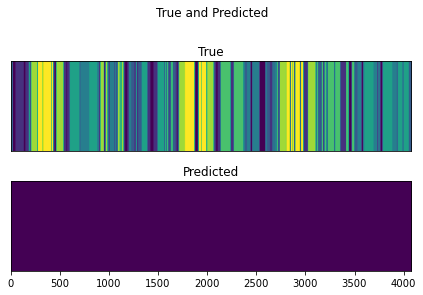

0.11945057640421879


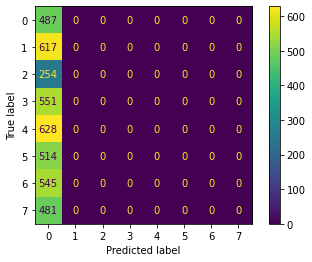

huawei_reduced_hmm_stationary_diagonal_ar_10000_10000_kmeans


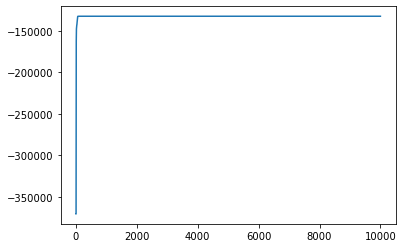

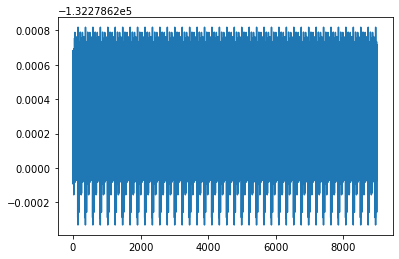

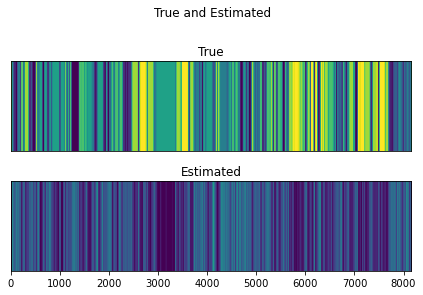

0.09245861434702636


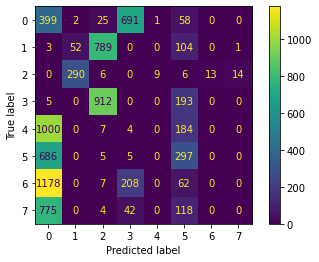

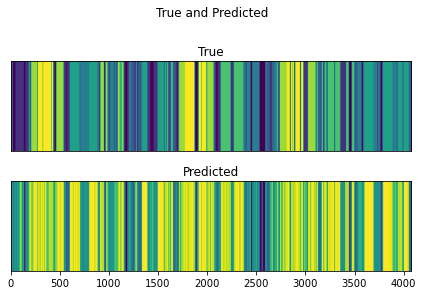

0.376747608535688


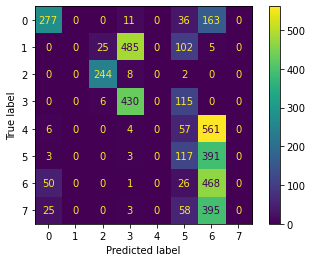

huawei_reduced_hmm_stationary_diagonal_robust_ar_10000_10000_kmeans


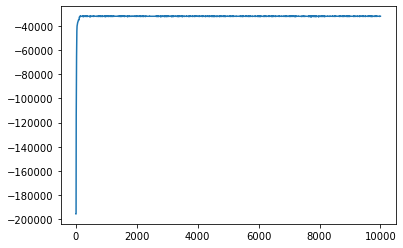

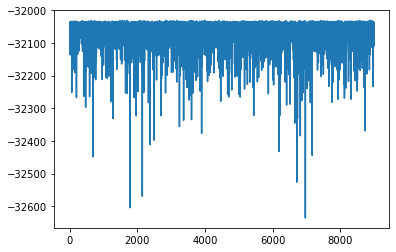

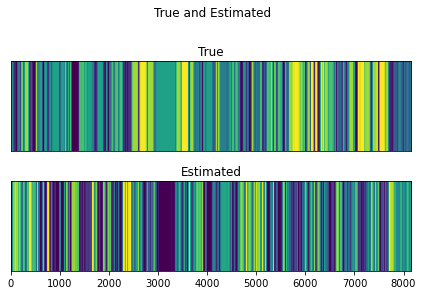

0.09957081545064378


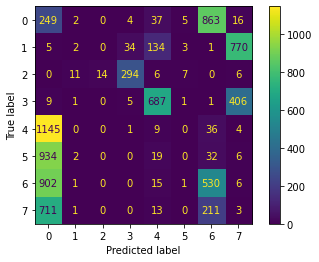

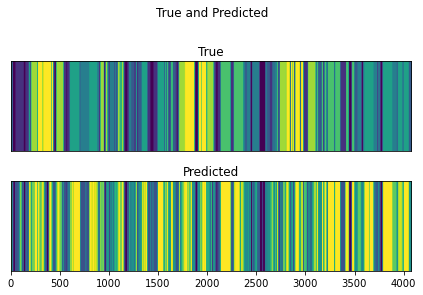

0.4748589649251901


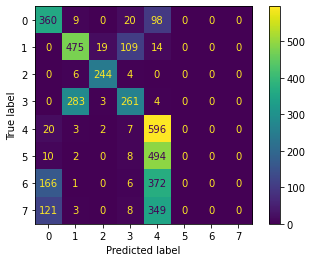

huawei_reduced_hmm_stationary_gaussian_10000_10000_random


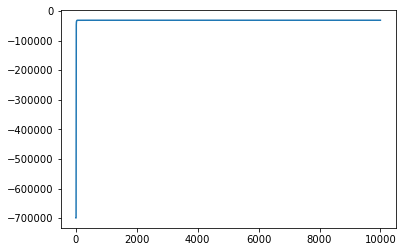

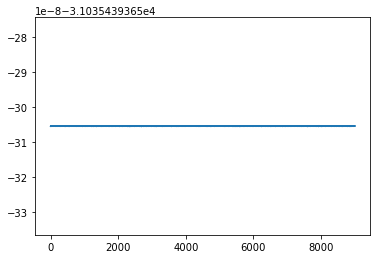

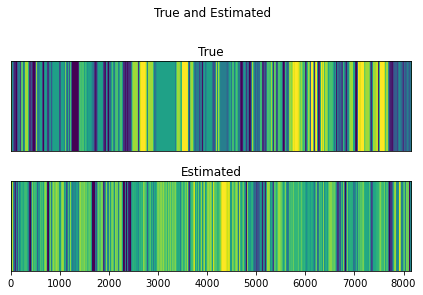

0.0815450643776824


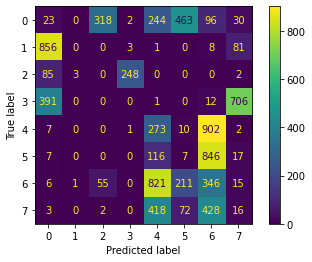

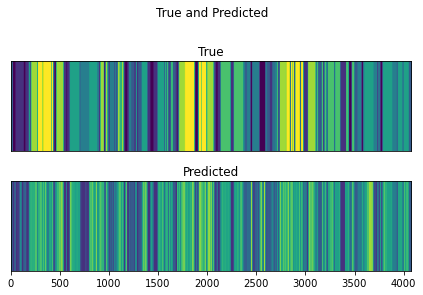

0.493990679421143


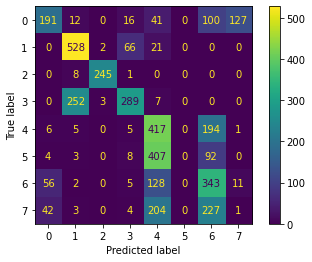

huawei_reduced_hmm_stationary_gaussian_10000_10000_kmeans


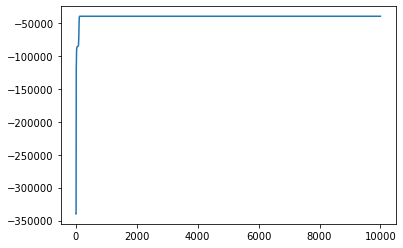

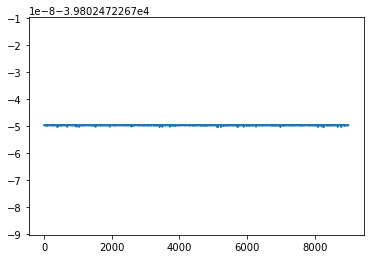

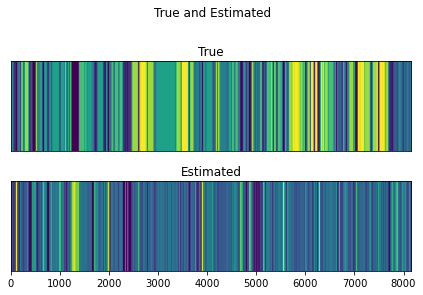

0.008461066830165542


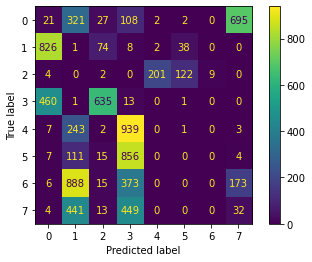

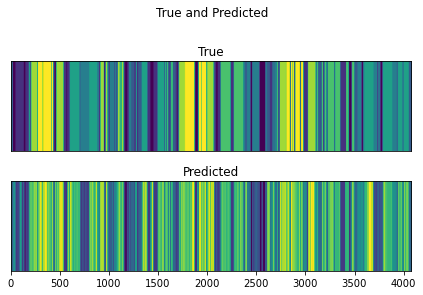

0.49251900907530044


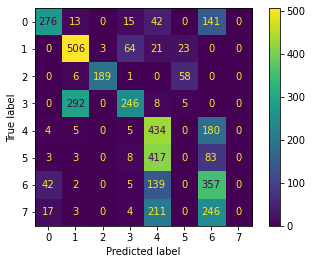

huawei_reduced_hmm_stationary_robust_ar_10000_10000_random


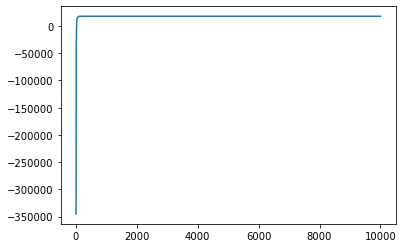

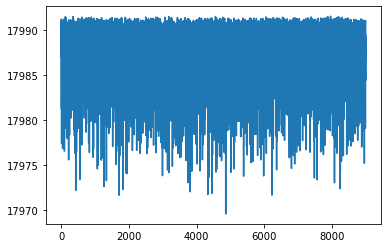

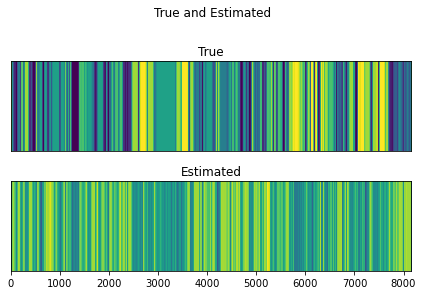

0.09773145309625997


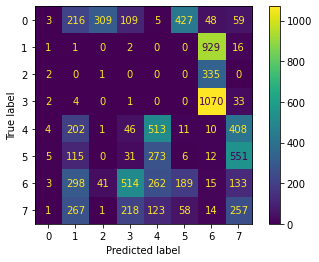

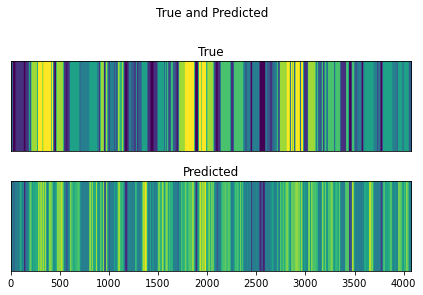

0.3806720627912681


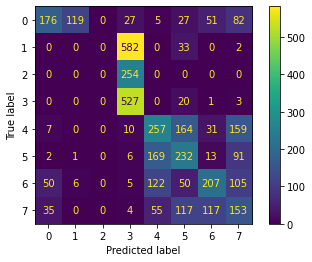

huawei_reduced_hmm_stationary_diagonal_robust_ar_10000_10000_random


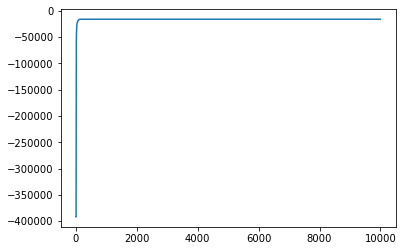

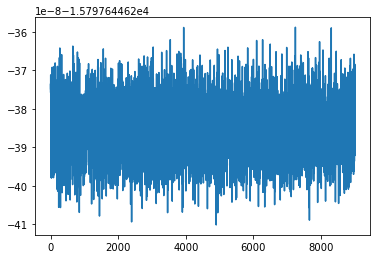

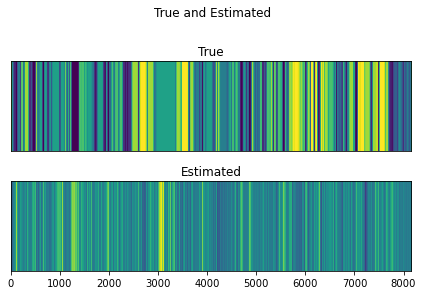

0.21275291232372778


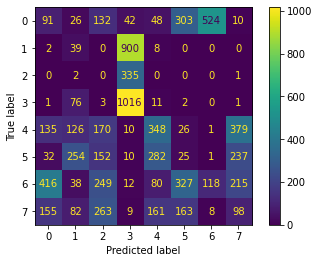

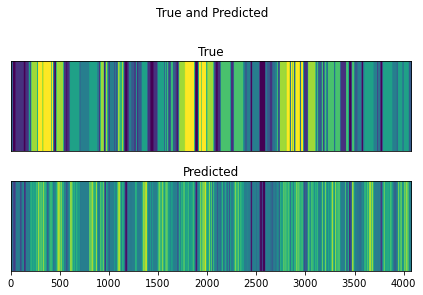

0.3465783664459161


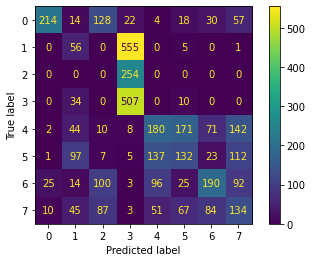

In [51]:
for f_name, model_dic in models_dic.items():
    prefix = f_name[:-7]
    print(prefix)
    model = model_dic["arhmm"]
    lls = model_dic["hmm_lls"]
    most_likely = model_dic["most_likely"]
    plt.plot(lls)
    plt.show()
    l = len(lls) // 10
    plt.plot(lls[l:])
    plt.show()
    plot_states(y_train, most_likely, "Estimated", prefix)
    print(accuracy_score(y_train, most_likely))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_train, most_likely))
    disp.plot()
    plt.show()
    y_predicted = model.most_likely_states(X_val)
    plot_states(y_val, y_predicted, "Predicted", prefix)
    print(accuracy_score(y_val, y_predicted))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_val, y_predicted))
    disp.plot()
    plt.show()

In [ ]:
"test"

In [ ]:
plot_states(y_train, models[0]["most_likely"], "estimated", 0 )

In [ ]:
accuracy_score(y_train, models[1]["most_likely"])

In [ ]:
confusion_matrix(y_train, models[1]["most_likely"])

In [ ]:
posterior_x = posterior.mean_continuous_states[0]
most_likely = rslds.most_likely_states(posterior_x, X_train)

In [ ]:
y_train

In [ ]:
# try:
perm = find_permutation(y_train.astype(int), most_likely)
rslds.permute(perm)
# except:
#     logging.error("Prediction exception")

In [ ]:
z_est = rslds.most_likely_states(posterior_x, X_train)
plot_states(y_train, z_est, "Predicted", 0)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_train, z_est)

In [ ]:
confusion_matrix(y_train, z_est)

In [ ]:
print(models[0]['hmm_lls'])

In [ ]:
plt.plot(models[1]['hmm_lls'][1000:])

In [ ]:
"test"